In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [12]:
df_org=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv")

In [13]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [14]:
df=df_org.sample(10000,random_state=42)

In [15]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
12628,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37730,8,0,0,0,0,0,0,0,0,0,...,187,190,196,201,209,221,218,211,102,0
39991,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8525,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8279,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df["label"].value_counts().sort_index()

,count
label,
0,1032
1,974
2,1001
3,1037
4,992
5,946
6,1047
7,999
8,952


In [18]:
torch.manual_seed(42)


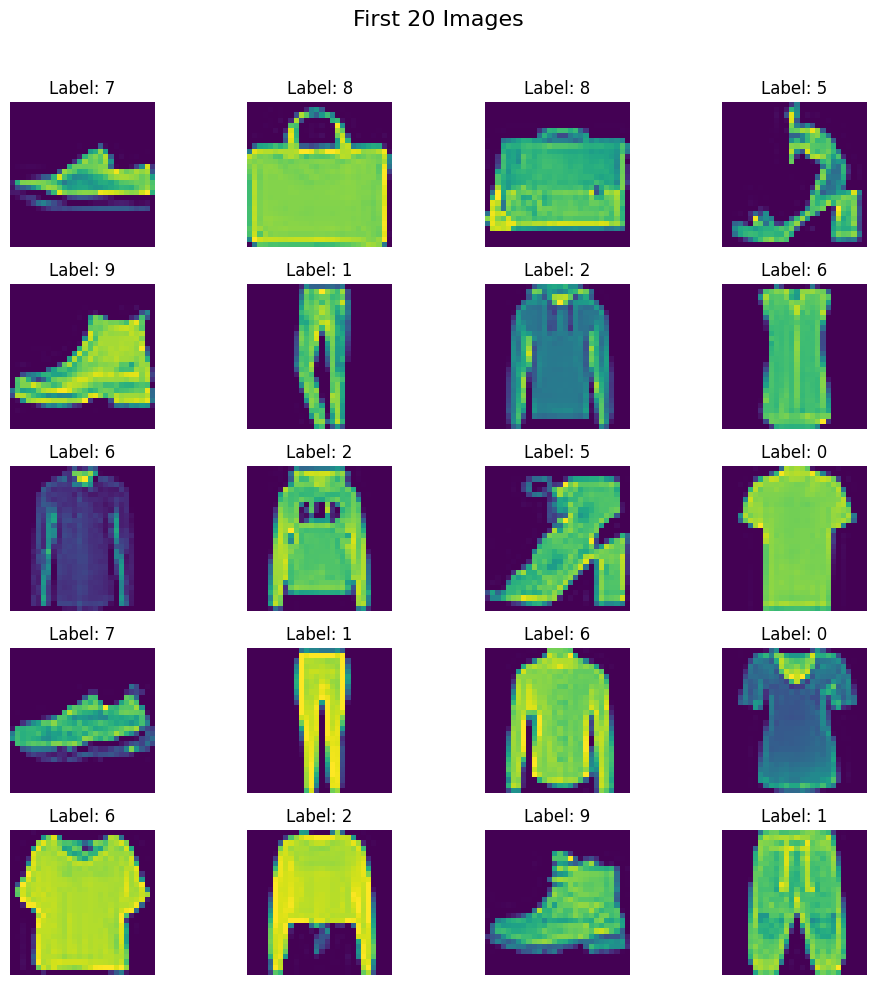

In [22]:
# Create a 5x4 grid of images
fig, axes = plt.subplots(5, 4, figsize=(10, 10))
fig.suptitle("First 20 Images", fontsize=16)

# Plot the first 20 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [23]:

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
X_train.shape

(8000, 784)

In [28]:
from numpy import float32
# create a customDataset class

class CustomDataset(Dataset):
  def __init__(self,features,labels) :
     self.features=torch.tensor(features,dtype=torch.float32)
     self.labels=torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index],self.labels[index]



In [40]:
X_train[0].shape

(784,)

In [42]:
X_train[0][:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [43]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [48]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

------

In [49]:
# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [50]:
# create train and test loader


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [55]:
# define nn class


class MySimpleNN(nn.Module):

  def __init__(self,num_features) :
     super().__init__()

     self.model =nn.Sequential(
         nn.Linear(num_features,128),
         nn.ReLU(),
         nn.Linear(128,64),
         nn.ReLU(),
         nn.Linear(64,10)
     )

  def forward(self,x):
    return self.model(x)


In [56]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [57]:
model=MySimpleNN(X_train.shape[1])

#loss fn
criterion=nn.CrossEntropyLoss()

#optimizer
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [58]:
len(train_loader)

250

In [59]:
train_loader

In [60]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 1.1176335266828537
Epoch: 2 , Loss: 0.6522533832788467
Epoch: 3 , Loss: 0.5627543292045594
Epoch: 4 , Loss: 0.49688583666086195
Epoch: 5 , Loss: 0.4586622070670128
Epoch: 6 , Loss: 0.4337401222884655
Epoch: 7 , Loss: 0.4091012688279152
Epoch: 8 , Loss: 0.3878897349536419
Epoch: 9 , Loss: 0.37710358637571334
Epoch: 10 , Loss: 0.3611737436950207
Epoch: 11 , Loss: 0.34683360588550566
Epoch: 12 , Loss: 0.3404564234018326
Epoch: 13 , Loss: 0.319279966250062
Epoch: 14 , Loss: 0.31326776707172393
Epoch: 15 , Loss: 0.3005982532799244
Epoch: 16 , Loss: 0.294265380486846
Epoch: 17 , Loss: 0.280006374835968
Epoch: 18 , Loss: 0.27311719486117364
Epoch: 19 , Loss: 0.26220238976180554
Epoch: 20 , Loss: 0.2529649098664522
Epoch: 21 , Loss: 0.2519572060853243
Epoch: 22 , Loss: 0.24178890140354634
Epoch: 23 , Loss: 0.22883073057234288
Epoch: 24 , Loss: 0.22884404790401458
Epoch: 25 , Loss: 0.22413196632266044
Epoch: 26 , Loss: 0.21593501637876034
Epoch: 27 , Loss: 0.20599409701675175
E

In [61]:
# set model to eval mode
model.eval()

MySimpleNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [62]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.865
